# **Muhammad Roufiqi Desma**

In [ ]:
# Importing Data processing libraries
import numpy as np 
import pandas as pd 
pd.plotting.register_matplotlib_converters()

# Plotting Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

In [ ]:
# Reading Data
# Download the dataset from here - 
uri = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic=pd.read_csv(uri)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Confirming the number of records for each species
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
# Shape of Data
titanic.shape

(891, 12)

In [ ]:
# Finding null count
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Descriptive analysis
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292



### Univariate Analysis


In [ ]:
# Distinct Species values
titanic["Survived"].unique()

array([0, 1])

In [ ]:
# Dividing data
tidak_selamat = titanic.loc[titanic['Survived'] == 0]    # jangan kasih tanda petik
selamat = titanic.loc[titanic['Survived'] == 1]    # nanti di bavariat kaga keliatan hasil nye

In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Passanger Id : Kode penumpang**

**Survived : 1 untuk Selamat, 0 untuk tidak selamat**

**Pclass : ketegori kelas penumpang (kelas 1 - 3)**

**SibSp : Pasangan**

**Parch : orang tua / anak penumpang**

**Fare : tarif**

**Sex : kelamin (male, female)**

**age : umur penumpang**

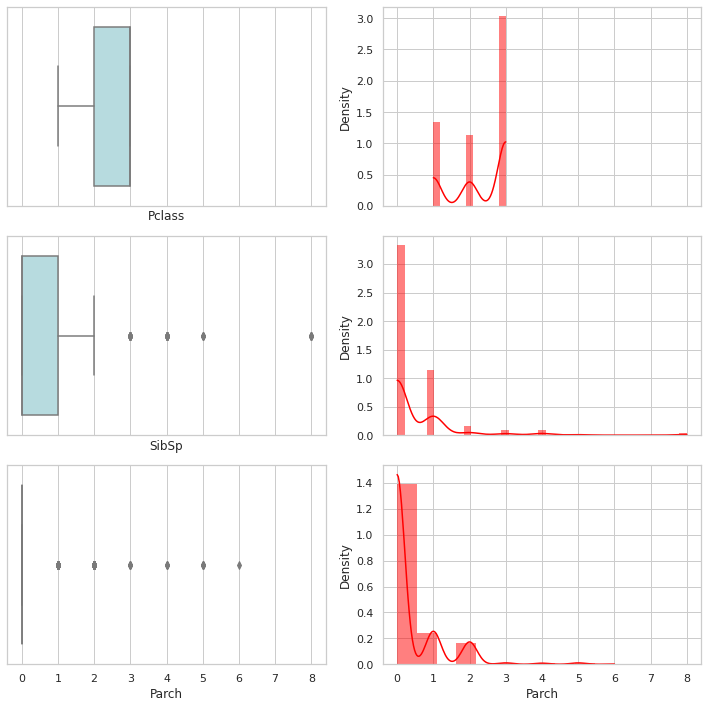

In [ ]:
# Setting up subplots
f,axes=plt.subplots(ncols=2,nrows=3,figsize=(10,10),sharex=True)
l=['Pclass', 'SibSp', 'Parch']
for i in range(3):
    
    #Ploting the boxplot
    sns.boxplot(x = titanic.loc[:,l[i]], ax=axes[i][0], color='powderblue')
    
    # Ploting the KDE
    sns.histplot(data=titanic.loc[:,l[i]], color="red", kde=True, stat="density", linewidth=0, ax=axes[i][1])  
    
    plt.tight_layout()


## Bivariate Data Analysis


**- Pclass vs class**

**- Age vs class**

**- Parch vs class**


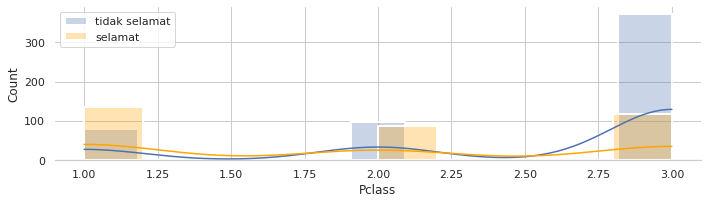

In [ ]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 1,figsize=(10, 3), sharex=True)
sns.despine(left=True)

# Ploting the histogram with KDE

sns.histplot(data=tidak_selamat["Pclass"],label="tidak selamat",color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=selamat["Pclass"],label="selamat",kde=True,color='orange',linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

Pada kelas 3, penumpang tidak banyak yg selamat

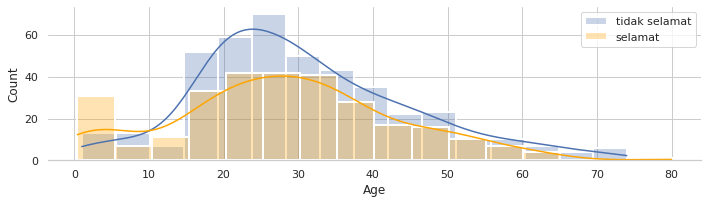

In [ ]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 1,figsize=(10, 3), sharex=True)
sns.despine(left=True)

# Ploting the histogram with KDE

sns.histplot(data=tidak_selamat["Age"],label="tidak selamat",color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=selamat["Age"],label="selamat",kde=True,color='orange',linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

Dari hasil tersebut, umur antara 20 - 30 dominan tidak selamat

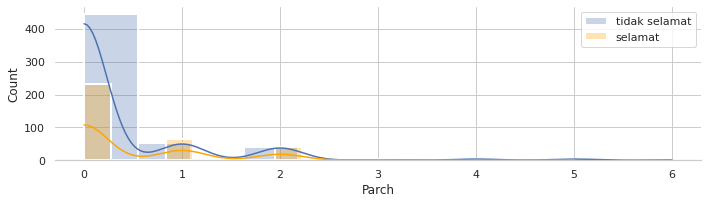

In [ ]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 1,figsize=(10, 3), sharex=True)
sns.despine(left=True)

# Ploting the histogram with KDE

sns.histplot(data=tidak_selamat["Parch"],label="tidak selamat",color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=selamat["Parch"],label="selamat",kde=True,color='orange',linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

Pada orang tua/anak, mungkin bisa di kategorikan bangsawan

orang - orang kaya (mungkin) diprioritaskan karena membayar

# Multivariate Analysis

## All species vs All Species

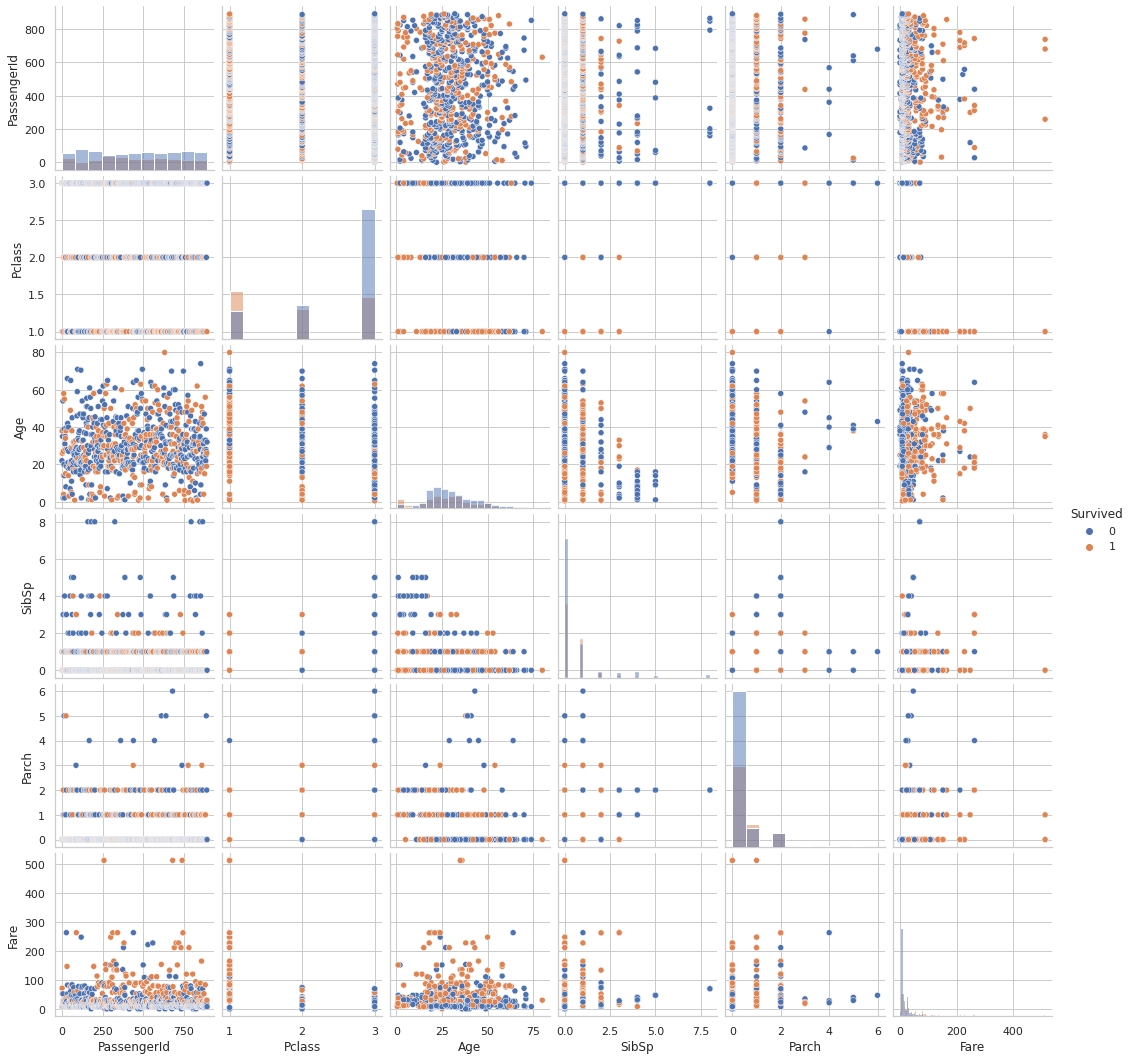

In [ ]:
sns.pairplot(titanic, hue="Survived", diag_kind="hist")
plt.show()



#### Plotting Swarm and Box Plots

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


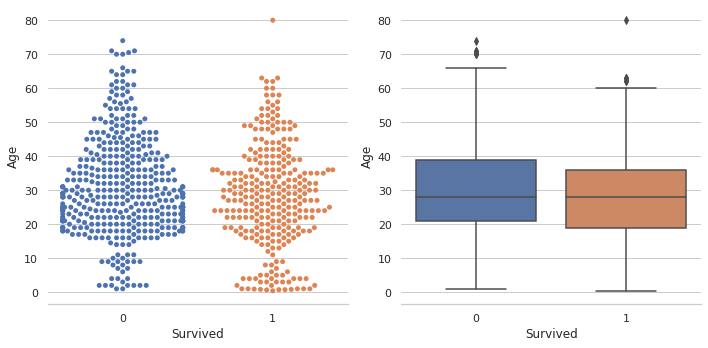

In [ ]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

# Plot the Swarmplot
sns.swarmplot(x=titanic['Survived'], y=titanic['Age'], ax=axes[0])

# Plot the Boxplot
sns.boxplot(x=titanic['Survived'], y=titanic['Age'], ax=axes[1])

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 89.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


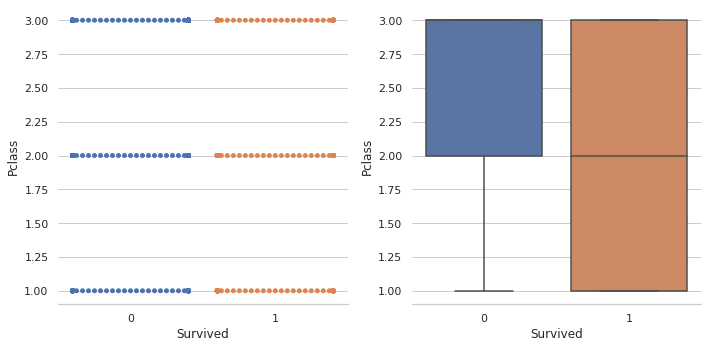

In [ ]:


# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

# Plot the Swarmplot
sns.swarmplot(x=titanic['Survived'], y=titanic['Pclass'], ax=axes[0])

# Plot the Boxplot
sns.boxplot(x=titanic['Survived'], y=titanic['Pclass'], ax=axes[1])

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 87.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 82.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


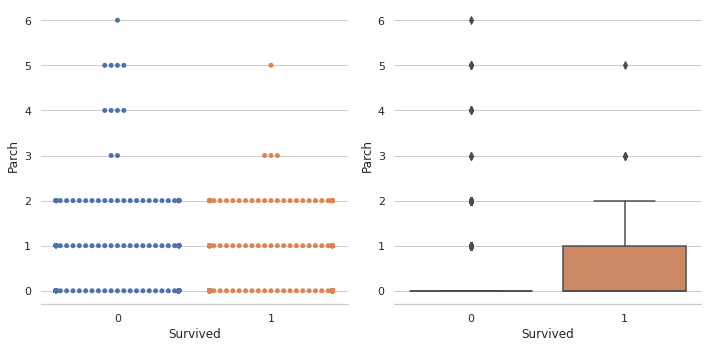

In [ ]:


# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

# Plot the Swarmplot
sns.swarmplot(x=titanic['Survived'], y=titanic['Parch'], ax=axes[0])

# Plot the Boxplot
sns.boxplot(x=titanic['Survived'], y=titanic['Parch'], ax=axes[1])

plt.tight_layout()